## LAB 5 - TASK 1 submission. ML 2024-25.


FILL UP THIS BOX WITH YOUR DETAILS

**NAME AND NIP**: 

- Ignacio Pastore Benaim, 920576
- David Padilla Orenga, 946874

# TSNE to visualize deep feature space
In this task we are applying TSNE to visualize how certain deep descriptor (extracted from a pre-trained CNN for image classification) organizes our data.

## 0. Get your deep features

First, you need to extract the features you want to analyze for your image set. The following code can be used to help you do it. You have a more detailed description of it in https://keras.io/api/applications/
Most features won't be a *flat* vector when you get them, because they have the shape of that layer output, remember you need to flatten them to have a 1-d vector as feature for each image.

In [10]:
# EXTRACT FEATURES from ANY pre-trained CNN (last layer before the classification)
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

import numpy as np
weights_path = '/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab4/src/last_finetuned_model_V1.keras'
img_path = '/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab4/data/mini-mini-flowers/Bluebell/image_0241.jpg'
# YOU CAN LOAD YOUR PRE-TRAINED MODEL FROM LAB3 to see how your fine-tuned features look like
img_width = 224
img_height = 224
IMG_SHAPE = (img_width, img_height) + (3,)
model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
#model = VGG16(include_top=False, weights='imagenet')


img_path = img_path
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print(features.shape)

2024-11-27 15:39:15.053764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 634ms/step
(1, 7, 7, 1280)


In [11]:
# You could EXTRACT ANY FEATURE FROM the CNN (explore model layer names with model.summary())
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.models import Model
import numpy as np

img_width = 224
img_height = 224
IMG_SHAPE = (img_width, img_height) + (3,)

base_model = MobileNetV2(input_shape=IMG_SHAPE, weights='imagenet')
#model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block_4_add').output)

img_path = img_path
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_features = model.predict(x)

print(block4_features.shape)

1/1 [==============================] - 0s 204ms/step
(1, 28, 28, 32)


2024-11-27 15:43:01.751353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [ ]:
# WRITE THE CODE YOU HAVE USED TO EXTRACT THE FEATURES
# Basically, a loop on the examples given above, that accumulates all
# flattened features in a numpy array, where each row is the feature of one image
# SAVE YOUR numpy matrix with all descriptors so you can try variations without computing them again

import os

image_dir = '/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab5/data/mini-mini-flowers'

# Make a for loop to extract features from all images in the directory
features = []
labels = []

# Load the model
img_width = 224
img_height = 224
IMG_SHAPE = (img_width, img_height) + (3,)
base_model = MobileNetV2(input_shape=IMG_SHAPE, weights='imagenet')
#model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block_4_add').output)

# Loop over all images in the directory
# Add a second loop to extract the label for each folder

for dir in os.listdir(image_dir):
    # Add a second loop to extract the label for each folder
    for image_name in os.listdir(os.path.join(image_dir, dir)):
            # Add a check for extensions with .jpg
        if not image_name.endswith('.jpg'):
         continue
        img_path = os.path.join(image_dir, dir, image_name)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        block4_features = model.predict(x)
    
        features.append(block4_features.flatten())
        labels.append(dir)

features = np.array(features)
labels = np.array(labels)

print(features.shape)
print (labels.shape)
print(labels[0:10])


2024-11-27 16:37:32.933188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 12ms/step
(200, 25088)
(200,)
['Crocus' 'Crocus' 'Crocus' 'Crocus' 'Crocus' 'Crocus' 'Crocus' 'Crocus'
 'Crocus' 'Crocus']


## 1. Run TSNE, visualize and analize the results

You could try any available implementation of TSNE.
We recommend the one from sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
or the one from TSNE author page (https://lvdmaaten.github.io/software/)

If you want to make nicer image mosaics, you can see the examples provided here (they are in Matlab, you'll have to write the equivalent in python)
https://cs.stanford.edu/people/karpathy/cnnembed/



### QUESTION TO DO in LAB5:
* Run TSNE twice, for two different feature extractors, i.e., extract all your features from two different layers, for your toy-dataset images (it could be two layers from the same model, or two layers one from each model). Play a bit with the parameters and configuration options until you think you have a decent visualization. **Note**: it's always recommended to run PCA (to reduce to around 50 long descriptors) before running TSNE. Comment on the code which params are you using. Save those images :-) You can just get plots of coloured points (according to their original class labels). If you would like to try to get nicer image-mosaics you can checkout numerous implementations online, but **it is not required for the lab**, e.g.:

    https://nextjournal.com/ml4a/image-t-sne

    https://github.com/YontiLevin/Embeddings2Image


* Discuss what you can see or sense from those results. How good are those features to represent your data? does it make sense compared to how good/bad the model was performing the image classification?


ANSWERS: [YOU ANSWER HERE] (max 6 lines)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

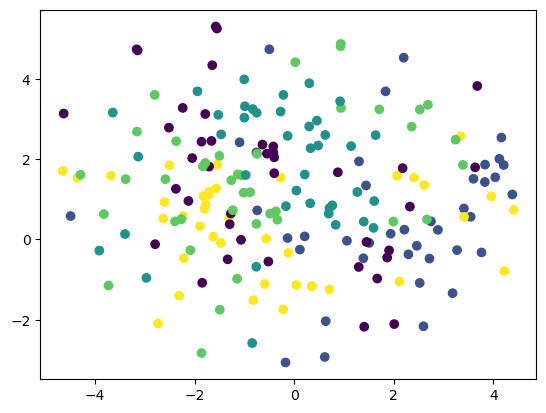

In [34]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# LOAD YOUR FEATURES
features = features 

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels_numeric = label_encoder.fit_transform(labels)

# RUN TSNE
features_embedded = TSNE(n_components=2).fit_transform(features)

# SAVE PLOTS/MOSAICS
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# scatter plot
scatter = plt.scatter(features_embedded[:,0], features_embedded[:,1], c=labels_numeric, cmap='viridis')
# Add legend with class names
plt.legend(handles=scatter.legend_elements()[0], labels=label_encoder.classes_)
plt.show()
